#Homework: Cross Sectional Regression

####Question 1

Download the data on consumption growth, rmrf, smb, hml, and rf and download the data on 10 portfolios sorted by book to market.

The linearized consumption based model 

$$E(R^{ei}_{t+1}) =  \text{cov} \left( \Delta c_{t+1}, R^{ei}_{t+1}\right) \gamma$$

1. Make a plot of average expected returns vs. covariance of returns with consumption growth. Include the three FF factor portfolios (rmrf, smb, hml) and the 10 book-market sorted portfolios. For your plots, report returns and average returns in percent units.

2. Run an OLS cross-sectional regression of average returns on covariances to obtain an estimate of $\gamma$. Do this both with and without a constant in the regression. (There are 13 data points in this regression, the 10 BM portfolios and $rmrf, \:hml, \:and \:smb$. )

3. Include the fitted line of the two regressions on your expected return vs. covariances plot.

Answer the following questions.

Report the intercept and $\gamma$ estimate from the OLS regression with a constant, and the $\gamma$ estimate from the OLS regression with no constant. Enter three numbers, separated by a space. Report your intercept in percent units (the intercept has units of expected return). 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

#Import data
gmm_data = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing/data/ \
                       coursera_gmm_data.txt', sep='\s+', skiprows=2, 
                       names=['dc', 'rmrf', 'smb', 'hml', 'rf'], index_col=0, 
                       parse_dates=True)

bm_data = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing2/data/ \
                       coursera_annual_beme_data.txt', sep='\s+', skiprows=1,
                       names = ['BM{:}'.format(i) for i in range(1,11)], index_col=0,
                       parse_dates=True)

#Remove risk free from data, merge the two series and normalise returns by 100
data = gmm_data.drop('rf', axis=1).join(bm_data, how='inner') 

#Compute covariance matrix
cov_mat = data.cov() 
(data * 100).describe()

,dc,rmrf,smb,hml,BM1,BM2,BM3,BM4,BM5,BM6,BM7,BM8,BM9,BM10
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,102.261135,7.868730,2.644444,4.911111,7.156032,7.615556,7.877619,8.385397,8.874444,9.088571,9.379206,11.028889,11.309841,13.403333
std,1.470640,18.330422,12.971837,12.950967,21.620323,17.741605,17.538953,18.563367,18.871937,18.040112,19.381075,21.469271,20.677114,26.149963
min,98.884600,-38.340000,-24.910000,-33.960000,-42.680000,-33.770000,-32.360000,-41.730000,-38.340000,-46.970000,-44.350000,-42.740000,-33.500000,-47.790000
25%,101.582250,-3.990000,-6.420000,-3.175000,-4.555000,-2.125000,-3.990000,-3.080000,-1.285000,-1.405000,-2.685000,-1.835000,-1.080000,-3.455000
50%,102.291400,10.660000,0.250000,5.190000,4.710000,8.160000,9.860000,10.420000,10.780000,9.880000,12.510000,13.370000,12.450000,15.610000
75%,103.103950,20.525000,8.735000,13.380000,21.380000,19.390000,19.685000,19.095000,18.100000,19.180000,21.380000,22.025000,22.655000,30.655000
max,105.715400,49.350000,51.090000,39.390000,51.420000,40.770000,44.410000,50.600000,57.830000,61.850000,55.080000,81.080000,74.550000,76.600000


1.8213 81.4906 101.0671


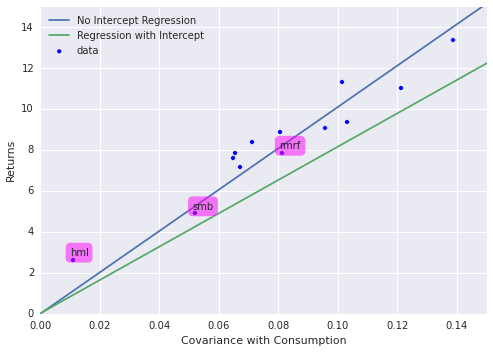

In [12]:
# Generate cross sectional regressions between returns and consumption with and without intercept
gamma_regr_int = sm.ols('ret ~ cova', data = {'ret' : data.mean(axis=0)[1:], 
                                              'cova' : cov_mat.ix[0, 1:]}).fit()

gamma_regr_no_int = sm.ols('ret ~ cova - 1', data = {'ret' : data.mean(axis=0)[1:], 
                                                     'cova' : cov_mat.ix[0, 1:]}).fit()

# Plot Results
labels = ['rmrf', 'hml', 'smb']
plt.scatter(cov_mat.ix[0, 1:] * 100, data.mean(axis = 0)[1:] * 100, label = 'data')
for label, x, y in zip(labels, cov_mat.ix[0, 1:4] * 100, data.mean(axis = 0)[1:4] * 100):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 2),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'magenta', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
x = np.linspace(0, 0.15)
plt.plot(x, gamma_regr_no_int.params.cova * x, label = 'No Intercept Regression')
plt.plot(x, gamma_regr_int.params.Intercept + gamma_regr_int.params.cova * x, 
         label = 'Regression with Intercept')
plt.xlim(0, 0.15)
plt.ylim(0, 15)
plt.xlabel('Covariance with Consumption')
plt.ylabel('Returns')
plt.legend(loc = 'best')

# Print and format answer
print('{:.4f} {:.4f} {:.4f}'.format(gamma_regr_int.params.Intercept * 100, 
                                    gamma_regr_int.params.cova,
                                    gamma_regr_no_int.params.cova))

####Question 2

For comparison, compute the betas of the 13 portfolios (3 factors and 10 B/M portfolios) against the market return. Run cross-sectional regressions of average excess returns on these 13 betas, with and without a constant. Make a plot of mean average excess return $E(R^{ei})$ vs. the CAPM $\beta_i$. Include the fitted value of your cross-sectional regression in the plot.

Report the coefficients of your cross sectional regression: intercept and market premium, and market premium, as three numbers separated by spaces. Both quantities have rate of return units, so report them in percent per year. 

3.5325 5.8474 9.4411


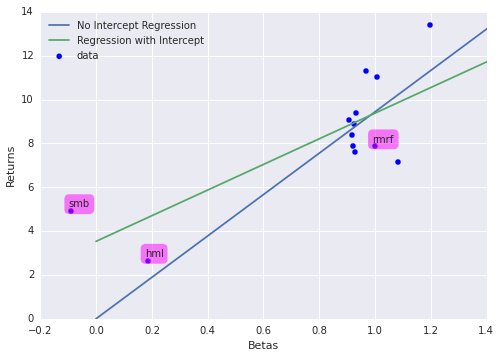

In [15]:
# Number of assets in cross sectional regression
T = data.shape[0]
N = data.shape[1] - 1

# Calculate Betas from time series regressions against market factor
betas_regr = [sm.ols('rets ~ rmrf', data= {'rets' : data.ix[:, i], 'rmrf' :data.rmrf}).fit()
              for i in range(1, N+1)]

betas = pd.DataFrame([betas_regr[i].params.rmrf for i in range(N)], index=data.columns[1:])

# Generate cross sectional regressions between returns and betas with and without intercept
lambdas_regr_int = sm.ols('rets ~ betas', data = {'rets' : data.mean(axis=0)[1:], 
                                                  'betas' : betas}).fit()

lambdas_regr_no_int = sm.ols('rets ~ betas - 1', data = {'rets' : data.mean(axis=0)[1:], 
                                                         'betas' : betas}).fit()

# Plot Results
plt.scatter(betas, data.mean(axis = 0)[1:] * 100, s=35, label = 'data')
for label, x, y in zip(labels, betas[:3].values, data.mean(axis = 0)[1:4] * 100):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 2),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'magenta', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
x = np.linspace(0, 14)
plt.plot(x, lambdas_regr_no_int.params.betas * x * 100, label = 'No Intercept Regression')
plt.plot(x, lambdas_regr_int.params.Intercept * 100 + lambdas_regr_int.params.betas * x * 100, 
         label = 'Regression with Intercept') 
plt.xlim(-0.2, 1.4)
plt.ylim(0, 14)
plt.xlabel('Betas')
plt.ylabel('Returns')
plt.legend(loc = 'best')

# Print and format answer
print('{:.4f} {:.4f} {:.4f}'.format(lambdas_regr_int.params.Intercept * 100, 
                                    lambdas_regr_int.params.betas * 100, 
                                    lambdas_regr_no_int.params.betas * 100))

####Question 3

1. Now, compute the standard error of the CAPM ols cross-sectional estimate without constant, $\sigma(\hat\lambda)$ in $E(R^{ei})=\beta_i\lambda+\alpha_i$. This is given on your formula sheet as "classic iid formula with no intercept."

2. As a comparison, compute $\sigma(\hat\lambda)=\sigma(rmrf)/\sqrt{T}$. After all, we should see $\lambda$ equals the mean market return, (hint, and your estimated $\lambda$ should have been of about that size).

3. As another comparison, compute $\sigma(\hat\lambda)$ from the standard OLS formula, $\sigma(\hat{\lambda})=(X'X)^{-1}var(\varepsilon)=(\beta'\beta)^{-1}var(\hat{\alpha})$. (Yes, alphas are the residuals of the cross sectional regression. In part I'm doing this to remind you of that fact.) 

In [4]:
# Time series regression errors
epsilon= pd.DataFrame(np.c_[[betas_regr[i].resid for i in range(N)]], 
                      index=data.columns[1:], columns=data.index)
# Lambda coefficient from cross sectional regression 
lambda_coeff = np.array(lambdas_regr_no_int.params.betas)
# Covariance matrix of epsilon
sigma_hat = epsilon.T.cov()
# Covariance matrix of factors
sigma_f = np.array([[data.cov().rmrf.rmrf]])
sigma_f_inv = np.linalg.pinv(sigma_f)
# Covariance matrix of alphas (errors of cross sectional regression)
cov_alpha = (betas.dot(sigma_f).dot(betas.T) + sigma_hat) / T
# beta square inverse
beta_inv = np.linalg.pinv(betas.T.dot(betas))
#Shanken correction
shanken = 1 + lambda_coeff.T.dot(sigma_f_inv).dot(lambda_coeff)
# Compute σ(λ) with the formula for cross sectional regression
sigma_lambda_cs = np.sqrt((beta_inv.dot(betas.T).dot(sigma_hat).dot(betas).dot(
                           beta_inv).dot(shanken) + sigma_f) / T)
# Compute σ(λ) with as mean of factor divided by root T
sigma_lambda_rmrf = data.rmrf.std() / np.sqrt(T)
# Compute σ(λ) with standard ols formula
sigma_lambda_ols = np.sqrt(beta_inv.dot(lambdas_regr_no_int.ssr / N))

print('{:.4f} {:.4f} {:.4f}'.format(sigma_lambda_cs[0, 0] * 100, sigma_lambda_rmrf * 100, 
                                    sigma_lambda_ols[0, 0] * 100))
print(lambdas_regr_no_int.summary())

2.3890 2.3094 0.6561
                            OLS Regression Results                            
Dep. Variable:                   rets   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 09 Apr 2015   Prob (F-statistic):           9.85e-09
Time:                        13:58:07   Log-Likelihood:                 31.495
No. Observations:                  13   AIC:                            -60.99
Df Residuals:                      12   BIC:                            -60.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
betas          0.0944      0.00

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


####Question 4

Next, compute the same standard error for the consumption-based model.

Using covariances on the right hand side $E(R^{ei})=cov(R^{ei},\Delta c) \gamma$ means the coefficient is interpretable as the risk aversion coefficient, which is why I like it. But the traditional formulas are expressed with betas on the right hand side. A fun (easy) exercise we will not do is to rederive the classic formulas with covariances in place of betas. Another fun (easy) exercise we will not do is to use the GMM for linear factor model formulas.

Instead, so you can reuse your CAPM code, just reestimate the linear consumption model as a relationship between average returns and betas $R^{ei}_t = a_i + \beta_{i,\Delta c}\Delta c_t + \varepsilon_{it}$, and then $E(R^{ei})= \beta_{i,\Delta c}\lambda_{\Delta c}+\alpha_i$


In [16]:
# Calculate Betas from time series regressions against consumption rate
betas_c_regr = [sm.ols('rets ~ consumption', data={'rets' : data.ix[:, i], 
                       'consumption' : data.dc}).fit() for i in range(1, N+1)]

betas_c = pd.DataFrame([betas_c_regr[i].params.consumption for i in range(N)], 
                       index=data.columns[1:])

# Generate cross sectional regressions between returns and betas with and without intercept
lam_regr_int = sm.ols('rets ~ betas', data = {'rets' : data.mean(axis=0)[1:], 
                      'betas' : betas_c}).fit()

lam_regr_no_int = sm.ols('rets ~ betas - 1', data = {'rets' : data.mean(axis=0)[1:], 
                         'betas' : betas_c}).fit()

# Time series regression errors
epsilon_c= pd.DataFrame(np.c_[[betas_c_regr[i].resid for i in range(N)]],
                        index=data.columns[1:], columns=data.index)
# Lambda coefficient from cross sectional regression 
lam_coeff = np.array(lam_regr_no_int.params.betas)
# Covariance matrix of epsilon
sigma_c_hat = epsilon_c.T.cov()
# Covariance matrix of factors
sigma_c_f = np.array([[data.cov().dc.dc]])
sigma_c_f_inv = np.linalg.pinv(sigma_c_f)
# beta square inverse 
beta_c_inv = np.linalg.pinv(betas_c.T.dot(betas_c))
#Shanken correction
shanken_c = 1 + lam_coeff.T.dot(sigma_c_f_inv).dot(lam_coeff)
# Compute σ(λ) with the formula for cross sectional regression
sigma_lam_cs = np.sqrt((beta_c_inv.dot(betas_c.T).dot(sigma_c_hat).dot(betas_c).dot(
                        beta_c_inv).dot(shanken_c) + sigma_c_f) / T)
# Compute σ(λ) with as mean of factor divided by root T
sigma_lam_dc = data.dc.std() / np.sqrt(data.shape[0])
# Compute σ(λ) with standard ols formula
sigma_lam_ols = np.sqrt(beta_c_inv.dot(lam_regr_no_int.ssr / N))

print('{:.4f} {:.4f}'.format(lam_regr_no_int.params.betas * 100, sigma_lam_cs[0, 0] * 100))
print('{:.4f} {:.4f} {:.4f}'.format(sigma_lam_cs[0, 0] * 100, sigma_lam_dc * 100, 
                                    sigma_lam_ols[0, 0] * 100))

print(lam_regr_no_int.summary())

2.1859 0.9026
0.9026 0.1853 0.0658
                            OLS Regression Results                            
Dep. Variable:                   rets   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1020.
Date:                Tue, 19 May 2015   Prob (F-statistic):           5.62e-13
Time:                        09:41:52   Log-Likelihood:                 42.059
No. Observations:                  13   AIC:                            -82.12
Df Residuals:                      12   BIC:                            -81.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
betas          0.

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


####Question 5

Finally, let's test these models. Compute the GRS-like (or JT-like) statistic ${\hat{\alpha}}'cov(\hat{\alpha})^{+}\hat{\alpha} \sim \chi^2_{\text{rank}(cov(\hat{\alpha}))}$ where + means pseudoinversion. (In Matlab, use pinv instead of inv.) Report the statistic for the CAPM and the consumption model, two numbers separated by a space. 

In [6]:
#Compute cov(α^) for CAPM model
cov_alpha_hat_capm = (np.eye(N) - betas.dot(beta_inv).dot(betas.T)).dot(sigma_hat).dot( 
                      np.eye(N) - betas.dot(beta_inv).dot(betas.T))  * shanken.ravel() / T

#Compute cov(α^) for consumption model
cov_alpha_hat_cons = (np.eye(N) - betas_c.dot(beta_c_inv).dot(betas_c.T)).dot(sigma_c_hat).dot(
                      np.eye(N) - betas_c.dot(beta_c_inv).dot(betas_c.T))  * \
                      shanken_c.ravel() / T

grs_capm = lambdas_regr_no_int.resid.T.dot(np.linalg.pinv(cov_alpha_hat_capm)).dot(
           lambdas_regr_no_int.resid)
grs_cons = lam_regr_no_int.resid.T.dot(np.linalg.pinv(cov_alpha_hat_cons)).dot(
           lam_regr_no_int.resid)

print('{:.4f} {:.4f}'.format(grs_capm, grs_cons))

28.4973 11.0699


####Question 6

Now, run a Fama-MacBeth cross sectional regression for both the CAPM and the consumption-based model. You should run the regressions both with and without a free intercept, i.e. $R^{ei}_t=\lambda_0+\beta_i \lambda + \alpha_{it}$ and $R^{ei}_t=\beta_i \lambda + \alpha_{it}$. However, you will only report the results without the intercept. 
Calculate the FMB standard errors $\sigma(\hat\lambda)$ for the CAPM and consumption-based model. Use percent units. The standard error for the CAPM is between 1 and 7, not 0.01 and 0.07. Enter these as two numbers, separated by a space. To think about: Are they the same, bigger or smaller, than the standard errors you calculated directly? Why?

Use the full sample betas in each regression. (Sometimes people use betas calculated up to time t only in the time t regressions. You don't have to do that.) Verify for yourself that the FMB estimate has the right relationship to the cross-sectional estimates that you produced before. 

In [20]:
#stack return, rmrf and consumption betas data
r = data.drop('dc', axis=1).stack()
b = pd.DataFrame(np.tile(betas.values, T).T, 
                 index=data.index, columns=data.columns[1:]).stack()
b_c = pd.DataFrame(np.tile(betas_c.values, T).T, 
                   index=data.index, columns=data.columns[1:]).stack()
capm_data = pd.DataFrame(np.c_[r, b], index=r.index, columns= ['rets', 'rmrf_beta'])
cons_data = pd.DataFrame(np.c_[r, b_c], index=r.index, columns= ['rets', 'cons_beta'])
#Call pandas Fama Mac Beth regression
fmb_capm_int = pd.fama_macbeth(y=capm_data.rets, x=capm_data[['rmrf_beta']])
fmb_capm_no_int = pd.fama_macbeth(y=capm_data.rets, x=capm_data[['rmrf_beta']], intercept=False)
fmb_cons_int = pd.fama_macbeth(y=cons_data.rets, x=cons_data[['cons_beta']])
fmb_cons_no_int = pd.fama_macbeth(y=cons_data.rets, x=cons_data[['cons_beta']], intercept=False)
#print summary results
print('{:.4f} {:.4f}'.format(fmb_capm_no_int.std_beta.rmrf_beta * 100, 
                             fmb_cons_no_int.std_beta.cons_beta * 100))
print('\n', fmb_capm_no_int)
print('\n', fmb_cons_no_int)
print('\n', fmb_capm_int)
print('\n', fmb_cons_int)

2.3536 0.5215

 
----------------------Summary of Fama-MacBeth Analysis-------------------------

Formula: Y ~ rmrf_beta
# betas :  63

----------------------Summary of Estimated Coefficients------------------------
     Variable          Beta       Std Err        t-stat       CI 2.5%      CI 97.5%
  (rmrf_beta)        0.0944        0.0235          4.01        0.0483        0.1405

--------------------------------End of Summary---------------------------------


 
----------------------Summary of Fama-MacBeth Analysis-------------------------

Formula: Y ~ cons_beta
# betas :  63

----------------------Summary of Estimated Coefficients------------------------
     Variable          Beta       Std Err        t-stat       CI 2.5%      CI 97.5%
  (cons_beta)        0.0219        0.0052          4.19        0.0116        0.0321

--------------------------------End of Summary---------------------------------


 
----------------------Summary of Fama-MacBeth Analysis-------------------------

In [8]:
# Run panel regressions as list comprehensions by calling T ols regressions of rmrf 
# or consumption beta against market returns and save the coefficient to an array
fm_rmrf = np.array([sm.ols('rets ~ beta -1', data=pd.DataFrame(np.c_[data.ix[i, 1:], betas], 
                   columns = ['rets', 'beta'])).fit().params[0] for i in range(T)])
fm_cons = np.array([sm.ols('rets ~ beta -1', data=pd.DataFrame(np.c_[data.ix[i, 1:], betas_c], 
                   columns = ['rets', 'beta'])).fit().params[0] for i in range(T)])

# Matrix inverse solution of linear regression
fm_pinv_rmrf = np.array([np.linalg.pinv(betas.T.dot(betas)).dot(betas.T).dot(data.ix[i, 1:]) 
                         for i in range(T)])
fm_pinv_cons = np.array([np.linalg.pinv(betas_c.T.dot(betas_c)).dot(betas_c.T).dot(data.ix[i, 1:]) 
                         for i in range(T)])

print('{:.4f} {:.4f}'.format(fm_rmrf.mean(), fm_rmrf.std() / np.sqrt(T)))
print('{:.4f} {:.4f}'.format(fm_cons.mean(), fm_cons.std() / np.sqrt(T)))

0.0944 0.0235
0.0219 0.0052
